In [2]:
from trainer import SSMTrainer
import torch as T

device = T.device("cuda" if T.cuda.is_available() else "cpu")
ssm_trainer = SSMTrainer(
    env='CartPole-v1',
    embedding_size=64,
    state_space_size=256,
    reward_threshold=50,
    reward_target=475,
    lr=1e-3,
    gamma=0.95,
    entropy_coefficient=0.01,
    validation_length=100,
    max_episode_time=1500,
    dir='cartpole_ssm_only',
    device=device
    )

In [3]:
ssm_trainer.train()

Episode 1: Reward = 19.0
Episode 2: Reward = 46.0
Episode 3: Reward = 13.0
Episode 4: Reward = 21.0
Episode 5: Reward = 17.0
Episode 6: Reward = 12.0
Episode 7: Reward = 8.0
Episode 8: Reward = 13.0
Episode 9: Reward = 12.0
Episode 10: Reward = 11.0
Episode 11: Reward = 11.0
Episode 12: Reward = 9.0
Episode 13: Reward = 10.0
Episode 14: Reward = 13.0
Episode 15: Reward = 12.0
Episode 16: Reward = 9.0
Episode 17: Reward = 11.0
Episode 18: Reward = 11.0
Episode 19: Reward = 11.0
Episode 20: Reward = 9.0
Episode 21: Reward = 12.0
Episode 22: Reward = 11.0
Episode 23: Reward = 9.0
Episode 24: Reward = 9.0
Episode 25: Reward = 11.0
Episode 26: Reward = 10.0
Episode 27: Reward = 13.0
Episode 28: Reward = 12.0
Episode 29: Reward = 9.0
Episode 30: Reward = 15.0
Episode 31: Reward = 9.0
Episode 32: Reward = 10.0
Episode 33: Reward = 9.0
Episode 34: Reward = 13.0
Episode 35: Reward = 10.0
Episode 36: Reward = 10.0
Episode 37: Reward = 9.0
Episode 38: Reward = 12.0
Episode 39: Reward = 9.0
Episod

In [4]:
ssm_trainer.replay_live()

Live Replay Episode Reward: 1233.0


In [5]:
df = ssm_trainer.compile_data()

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

df.head()

,recurrent_block.real_transition_matrix,recurrent_block.img_transition_matrix,recurrent_block.real_hidden_matrix,recurrent_block.img_hidden_matrix,recurrent_block.embedding_layer.weight,recurrent_block.output_gate.weight,recurrent_block.input_gate.0.weight,recurrent_block.input_gate.1.smoothness,recurrent_block.discretization_matrix.0.weight,recurrent_block.discretization_matrix.1.smoothness,...,recurrent_block.state_prediction.0.weight,recurrent_block.state_prediction.0.bias,recurrent_block.state_prediction.1.weight,recurrent_block.state_prediction.1.bias,recurrent_block.state_prediction.3.weight,recurrent_block.state_prediction.3.bias,training_steps,training_reward,validation_reward,loss
0,0.000013,0.000206,0.000526,0.000279,0.208467,0.013373,0.275382,0.007857,0.000025,7.273212e-07,...,4.487819,3.128125,0.643872,0.400008,5.085557,1.254323,19,19.0,0.0,-0.025746
1,0.000013,0.000207,0.000216,0.000112,0.145550,0.012052,0.413328,0.021673,0.000019,2.852250e-06,...,14.581357,9.836538,1.802209,1.372236,14.795896,4.010384,65,46.0,0.0,0.611425
2,0.000041,0.000711,0.003005,0.001644,0.660333,0.159821,1.705262,0.171648,0.000283,7.117505e-05,...,9.633518,7.121181,1.239710,0.905046,10.709745,2.694342,78,13.0,0.0,-0.161789
3,0.000025,0.000405,0.001014,0.000545,0.445855,0.038831,0.721790,0.036396,0.000082,3.635430e-05,...,8.616247,6.247746,1.384589,0.855367,11.702347,2.756612,99,21.0,0.0,-0.953659
4,0.000013,0.000213,0.000807,0.000440,0.321535,0.027697,0.454568,0.005136,0.000049,1.684911e-05,...,13.775634,8.250360,2.278049,1.318834,18.168329,4.415971,116,17.0,0.0,-0.834347


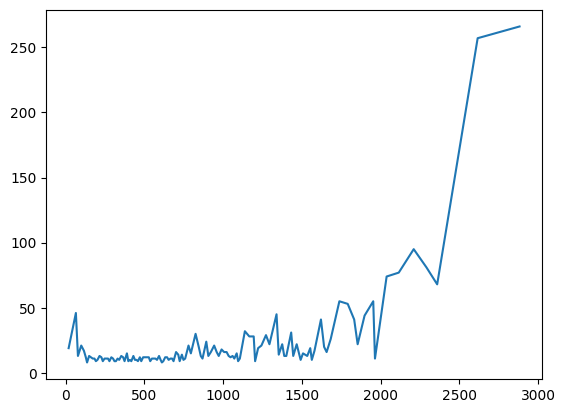

In [7]:
plt.plot(df['training_steps'],df['training_reward'])

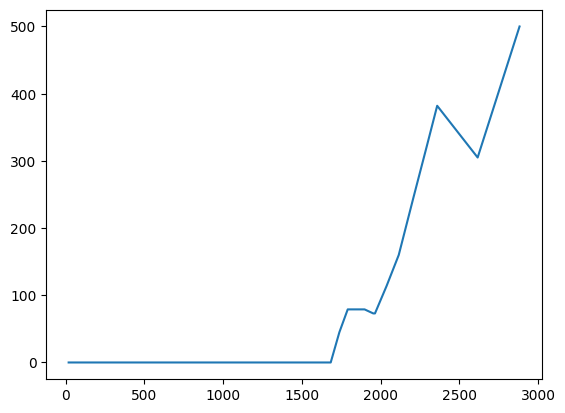

In [8]:
plt.plot(df['training_steps'],df['validation_reward'])